# 비정상 절차서 63-02 : 제어봉의 계속적인 삽입

경보 및 증상

자동 동작사항

긴급 조치사항

후속 조치사항

## 1.0 데이터 처리

In [36]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
with open('D:/1.All_python_project/New_CNS_db/ab63_02_4.pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5), 4:deque(maxlen=5), 5:deque(maxlen=5)}

## 2.0 경보 및 증상

### 2.1 제어봉 위치 지시계와 스텝계수기상의 계속적인 제어봉 삽입

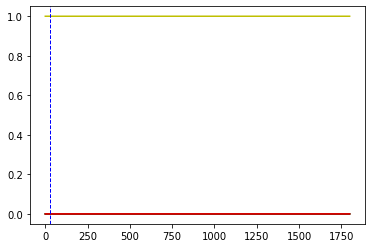

In [11]:
# KBCDO10 : control bank A position.
# KBCDO9 : control bank B position.
# KBCDO8 : control bank C position.
# KBCDO7 : control bank D position.
plt.plot(db['KLAMPO12'], color='g')
plt.plot(db['KLAMPO13'], color='k')
plt.plot(db['KLAMPO14'], color='r')
plt.plot(db['KLAMPO15'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

제어봉 변수 확인

### 2.2  원자로 출력 감소

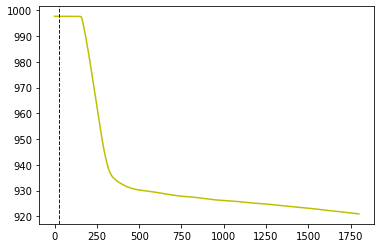

In [47]:
# ZINST124 : generator outpit (MWe)
# KBCDO22 : generator output MW
# KBCDO23 : RX power  (%)
plt.plot(db['ZINST124'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

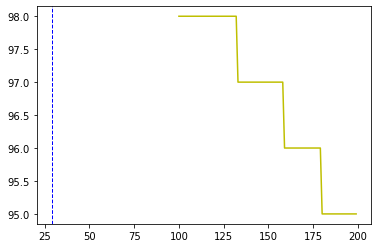

In [56]:
plt.plot(db['KBCDO23'].iloc[100:200], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

원자로 출력 관련 변수는 다음과 같이 3개 있다. (ZINST124,KBCDO22,KBCDO23)

그중 ZINST124변수를 제외하고 위의 그래프와 같이 계단식으로 감소하기 때문에 증상확인이 어렵다

In [45]:
power = []
for i in range(len(db)):
    if i > 29:
        sym_ch[0].append(db['ZINST124'][i])
    if len(sym_ch[0]) == 5:
        if sym_ch[0][0] > sym_ch[0][1] > sym_ch[0][2] > sym_ch[0][3] > sym_ch[0][4]:
            power.append(i+1)
if len(power) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 원자로 출력 감소 증상 만족 시간 : {power[0]}초')

최초 원자로 출력 감소 증상 만족 시간 : 51초


### 2.3 “T REF/AUCT T AVG HIGH” 경보 발생

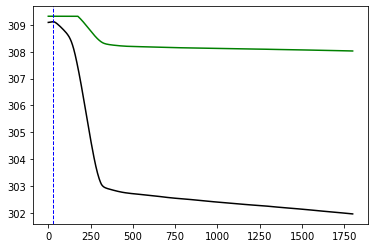

In [59]:
# KLAMPO313 : ALARM: TREF/AUCT. TAVG DEVIATION HIGH(1.67 DEG C) 
# UAVLEGS : SETPOINT FOR PRIMARY AVERAGE COOLANT TEMPERATURE (DEG. C).
# UAVLEGM : LOOP 1,2,3 AVERAGE TEMPERATURE(MEAN VALUE).
# CUTDEV : TREF AND TAUCT HIGH DEVIATION SETPOINT
plt.plot(db['UAVLEGS'], color='g')
plt.plot(db['UAVLEGM'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [60]:
t_avg = []
for i in range(len(db)):
    if i > 29:
        if abs(db['UAVLEGS'][i] - db['UAVLEGM'][i]) > db['CUTDEV'][i]:
            t_avg.append(i+1)
if len(t_avg) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 “T REF/AUCT T AVG HIGH” 경보 발생 시간 : {t_avg[0]}초')

최초 “T REF/AUCT T AVG HIGH” 경보 발생 시간 : 168초


### 2.4 “ROD BANKS LOW/LO-LO LIMIT” 경보 발생

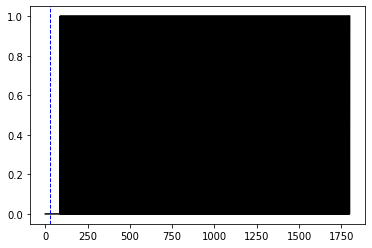

In [62]:
# KLAMPO254 : ALARM: CONTROL BANK LOW-LOW LIMIT
plt.plot(db['KLAMPO254'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

ToDo...

alarm logic으로 구현하는 방법 이해하기 어려움..

In [63]:
rod_lo = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO254'][i] == 1:
            rod_lo.append(i+1)
if len(rod_lo) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 “T REF/AUCT T AVG HIGH” 경보 발생 시간 : {rod_lo[0]}초')

최초 “T REF/AUCT T AVG HIGH” 경보 발생 시간 : 88초


### 2.5 “COMPARATOR PWR RANGE DEVIATION” 경보 발생

관련알람 확인 불가.

### 2.6 “PR UPPER/ LOWER HI FLUX DEV/AUTO DEFEAT” 경보 발생

관련알람 확인 불가.

### 2.7 “DELTA FLUX” 경보 발생

관련알람 확인 불가.

## 4.0 긴급 조치사항

### 4.1 터빈런백(OTΔT, OPΔT, 복수펌프 2/4 정지, 주급수펌프 1/3 이상 정지, 가열기배수 펌프 2/2 정지, 고정자냉각수 저유량)에 의한 제어봉의 자동 삽입인지 확인

### 4.2 터빈 런백이 아니면 제어봉 제어 선택스위치를 수동으로 전환

### 4.3 제어봉이 계속 삽입되어 원자로 정지가 발생하면 “비상운전절차서(비상-0 : 원자로 트립 또는 SI)”에 따라 조치

### 4.4 제어봉의 삽입이 멈추면 원인을 규명

### 4.5 수동으로 제어봉을 인출하여 Tavg와 Tref를 일치